# Fitzhugh-Nagumo

The Fitzhugh-Nagumo (FHN) model is a simplified version of the Hodgkin-Huxley model, providing a reduced mathematical framework for understanding neuronal dynamics. It captures the essential nonlinear characteristics of excitable neurons with just two variables: a fast voltage-like variable (v) and a slow recovery variable (w). This model elegantly reproduces action potentials, refractory periods, and excitation thresholds while being computationally tractable and mathematically analyzable.

## Key Properties

1. **Excitability**: Generates action potentials when input exceeds threshold
2. **Refractoriness**: Exhibits refractory periods after firing
3. **Two-Dimensional Dynamics**: Uses fast-slow dynamics to capture neuronal behavior
4. **Oscillatory Behavior**: Can exhibit autonomous oscillations (limit cycles)
5. **Bistability**: Can display both resting and oscillatory states under certain parameter regimes

## Mathematical Description

The model is described by two coupled differential equations:

dv/dt = v - v³/3 - w + I

dw/dt = ε(v + a - bw)

Parameters:
- v: Fast variable analogous to membrane potential
- w: Slow recovery variable analogous to ion channel gating
- I: External current/stimulus
- a: Parameter controlling the location of w-nullcline (typically 0.6-0.8)
- b: Parameter controlling the slope of w-nullcline (typically 0.7-0.8)
- ε: Time scale separation parameter (typically 0.01-0.1, must be << 1)

State Variables:
- v: Fast variable (initialize at resting state, typically -1.5 to -0.5)
- w: Slow variable (initialize at resting state, typically -0.5 to 0.5)

Time-related variables:
- dt: Time step for numerical integration
- t: Current simulation time
- tmax: Maximum simulation time

## Algorithm

1. Initialize state variables
   - Set v to a resting value (e.g., -1.0)
   - Set w to a resting value (e.g., -0.6)
   - Create arrays to store values for plotting

2. For each time step from t=0 to t=tmax:
   
   a. Compute derivative terms
      - dv/dt = v - v³/3 - w + I
      - dw/dt = ε(v + a - bw)
   
   b. Update state variables using numerical method (e.g., Euler, RK4)
      - Using Euler method:
        v = v + dv/dt * dt
        w = w + dw/dt * dt
   
   c. Store variables for plotting
      - Record v, w at current time step
   
   d. Increment time: t = t + dt

3. Analyze and visualize results
   - Plot v (voltage-like variable) vs time
   - Plot w (recovery variable) vs time
   - Create phase-plane plot (v vs w)
   - Overlay nullclines on phase-plane for analysis

## Characteristic Behaviors

1. **Excitation Threshold**: Subthreshold stimuli cause small, transient responses; suprathreshold stimuli trigger full action potentials
2. **Action Potential**: Rapid upstroke followed by slower downstroke and undershoot
3. **Refractory Period**: Reduced excitability following an action potential
4. **Limit Cycle Oscillations**: Spontaneous rhythmic firing under certain parameter values
5. **Canard Explosion**: Rapid transition from small to large amplitude oscillations as parameters change
6. **Phase Resetting**: Shifts in oscillation timing due to perturbations

## Biological Mechanisms Represented

The two variables represent:
- v: Membrane potential and fast positive feedback processes (primarily Na⁺ channel activation)
- w: Combination of slower processes (K⁺ channel activation and Na⁺ channel inactivation)

The cubic nullcline represents:
- The balance between inward and outward currents
- Multiple equilibrium points corresponding to resting, threshold, and excited states

The linear nullcline represents:
- The slower recovery processes that restore the resting state
- The dynamics of slower channel kinetics

## Applications

The FHN model is particularly useful for studying:
- Basic neuronal excitability and threshold behavior
- Neuronal oscillations and pacemaker activity
- Cardiac tissue excitability and arrhythmias
- Pattern formation in excitable media
- Synchronization in neural populations
- Mathematical analysis of bifurcations in nonlinear systems
- Teaching concepts of computational neuroscience

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class FitzHughNagumo():
    def __init__(self, a, b, tau, I, time_steps):
        """
        Initialize the FitzHugh-Nagumo model.
        
        Parameters:
        - a: Parameter controlling the recovery dynamics (typically around 0.7)
        - b: Parameter controlling the recovery dynamics (typically around 0.8)
        - tau: Time scale separation parameter (typically > 1)
        - I: Input current
        - time_steps: Array of time points for simulation
        """
        self.a = a
        self.b = b
        self.tau = tau
        self.I = I
        self.time_steps = time_steps
        
    def dvdt(self, v, w):
        """Compute the rate of change of the voltage variable."""
        return v - (v**3)/3 - w + self.I
    
    def dwdt(self, v, w):
        """Compute the rate of change of the recovery variable."""
        return (v + self.a - self.b * w) / self.tau
    
    def simulate(self):
        """Run the FitzHugh-Nagumo simulation."""
        # Initialize arrays for storing voltage and recovery variable
        v = np.zeros(len(self.time_steps))
        w = np.zeros(len(self.time_steps))
        
        # Initial conditions
        v[0] = -1.0  # Start with a hyperpolarized state
        w[0] = -0.5  # Initial recovery variable
        
        # Time step size
        dt = self.time_steps[1] - self.time_steps[0]
        
        # Fourth-order Runge-Kutta integration
        for i in range(len(self.time_steps) - 1):
            # RK4 for v
            k1_v = self.dvdt(v[i], w[i])
            k2_v = self.dvdt(v[i] + 0.5 * dt * k1_v, w[i] + 0.5 * dt * k1_v)
            k3_v = self.dvdt(v[i] + 0.5 * dt * k2_v, w[i] + 0.5 * dt * k2_v)
            k4_v = self.dvdt(v[i] + dt * k3_v, w[i] + dt * k3_v)
            
            # RK4 for w
            k1_w = self.dwdt(v[i], w[i])
            k2_w = self.dwdt(v[i] + 0.5 * dt * k1_v, w[i] + 0.5 * dt * k1_w)
            k3_w = self.dwdt(v[i] + 0.5 * dt * k2_v, w[i] + 0.5 * dt * k2_w)
            k4_w = self.dwdt(v[i] + dt * k3_v, w[i] + dt * k3_w)
            
            # Update variables
            v[i+1] = v[i] + (dt/6) * (k1_v + 2*k2_v + 2*k3_v + k4_v)
            w[i+1] = w[i] + (dt/6) * (k1_w + 2*k2_w + 2*k3_w + k4_w)
        
        return v, w
    
    def plot_results(self, v, w):
        """Plot the results of the simulation."""
        plt.figure(figsize=(12, 8))
        
        # Plot voltage variable
        plt.subplot(2, 2, 1)
        plt.plot(self.time_steps, v, 'b', label='Voltage (v)')
        plt.xlabel('Time')
        plt.ylabel('Voltage (v)')
        plt.title('Membrane Potential')
        plt.grid(True)
        
        # Plot recovery variable
        plt.subplot(2, 2, 2)
        plt.plot(self.time_steps, w, 'g', label='Recovery (w)')
        plt.xlabel('Time')
        plt.ylabel('Recovery (w)')
        plt.title('Recovery Variable')
        plt.grid(True)
        
        # Phase plane
        plt.subplot(2, 2, 3)
        plt.plot(v, w, 'r')
        plt.xlabel('Voltage (v)')
        plt.ylabel('Recovery (w)')
        plt.title('Phase Plane')
        plt.grid(True)
        
        # Add nullclines to phase plane
        v_range = np.linspace(min(v) - 0.5, max(v) + 0.5, 100)
        w_v_nullcline = v_range - (v_range**3)/3 + self.I
        w_w_nullcline = (v_range + self.a) / self.b
        
        plt.subplot(2, 2, 4)
        plt.plot(v, w, 'r', alpha=0.5, label='Trajectory')
        plt.plot(v_range, w_v_nullcline, 'b', label='v-nullcline')
        plt.plot(v_range, w_w_nullcline, 'g', label='w-nullcline')
        plt.xlabel('Voltage (v)')
        plt.ylabel('Recovery (w)')
        plt.title('Phase Plane with Nullclines')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

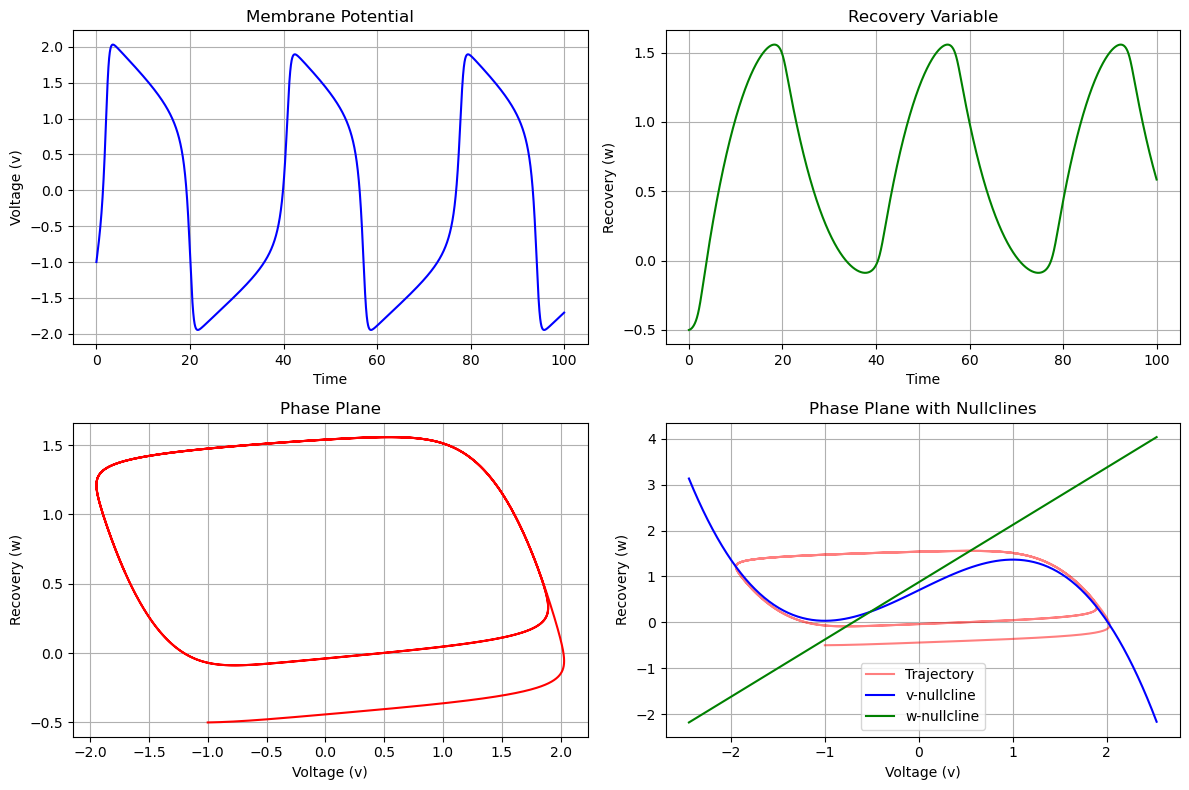

In [3]:
# Parameters for the FitzHugh-Nagumo model
t_max = 100  # time units
dt = 0.01    # time step
time_steps = np.arange(0, t_max, dt)

# Create FitzHugh-Nagumo neuron
fhn = FitzHughNagumo(
    a=0.7,      # Parameter a
    b=0.8,      # Parameter b
    tau=12.5,   # Time scale separation
    I=0.7,      # Input current
    time_steps=time_steps
)

# Run simulation
v, w = fhn.simulate()

# Plot results
fhn.plot_results(v, w)